# Project 2
# Submitted by: Prateek Kumar
# Python: 3.7.0

Below here is the continued code from Project 1 where we were asked to 

1) add the columns: 'Sepal ratio' and 'Petal ratio'

2) Update the 35th and 38th column

So that we can get the correct plot for the dataset.

In [1]:
#Continued code from project 1
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "https://raw.githubusercontent.com/ongbw/UN5550-Fall2018/master/projects/data/iris.csv" #url of raw version of iris dataset from data/iris.csv
dataset = pd.read_csv(path) #Reading the iris dataset from the url

new_35 = [4.9,3.1,1.5,0.2,"setosa"] #storing the corrected values in the list
new_38 = [4.9,3.6,1.4,0.1,"setosa"]

for i in range(0,len(dataset.loc[34,:])):
    dataset.iloc[34, i] = new_35[i] #Replacing old values with the new ones

for i in range(0,len(dataset.loc[37,:])):
    dataset.iloc[37, i] = new_38[i] #Replacing old values with the new ones

sepal_ratio = []
if((dataset.count()[0])==(dataset.count()[1])): #checking if we have any entries missing in the rows
    for val in range(0,dataset.count()[0]):
        sepal_ratio.append(round((dataset.iloc[val][0]/dataset.iloc[val][1]),1)) #calculating sepal ratio and storing it to the list
else:
    print("We have missing values")

dataset['Sepal ratio'] = sepal_ratio #adding the column to the dataset

petal_ratio = []
if((dataset.count()[2])==(dataset.count()[3])):
    for val in range(0,dataset.count()[2]):
        petal_ratio.append(round((dataset.iloc[val][2]/dataset.iloc[val][3]),1)) #calculating petal ratio and storing it to the list
else:
    print("We have missing values")

dataset['Petal ratio'] = petal_ratio #adding the column to the dataset

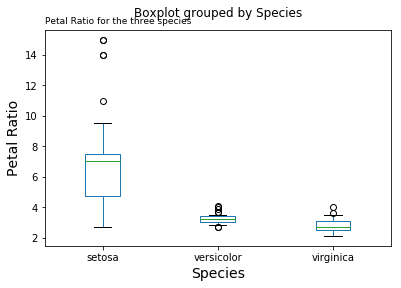

In [2]:
# box and whisker plots pandas package
plot1 = dataset.boxplot(by='Species', column=['Petal ratio'],grid=False,showfliers=True, whis=0.75) # boxplot showing the distribution of the petal ratio for each of the three species

plot1.set_title('Petal Ratio for the three species', fontsize=9, loc= 'left') # setting the title
plot1.get_figure().gca().set_title("") # removes the default title from the boxplt
plot1.set_xlabel('Species',fontsize=14) # setting x-axis label with fontsize 14
plot1.set_ylabel('Petal Ratio', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot

The box plot helps in displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. In a basic box plot the central rectangle spans the first quartile(lower part of the box i.e. 25th percentile value) to the third quartile(upper part of the box i.e. 75th percentile value) (the interquartile range or IQR). A segment inside the rectangle shows the median(50th percentile value) and "whiskers" above and below the box show the locations of the minimum and maximum(where ideally data should look like minimum and maximum, it is not from the actual data).

Any value >= Q3 + 1.5*(Q3-Q1) or <= Q1 - 1.5*(Q3-Q1) are possible outliers.

Any value >= Q3 + 3*(Q3-Q1) or <= Q1 - 3*(Q3-Q1) are most probable outliers.

To deal with outliers we can either floor the values or we can just remove the observation with extreme value.

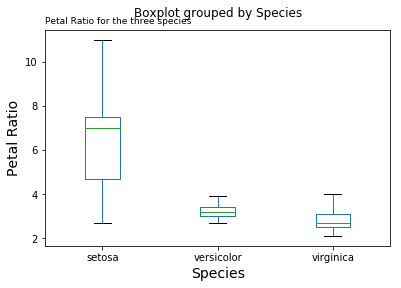

In [3]:
# box and whisker plots without outliers
plot1 = dataset.boxplot(by='Species', column=['Petal ratio'],grid=False, showfliers=False) 
# here we just removed the extreme values from being displayed from the plot

plot1.set_title('Petal Ratio for the three species', fontsize=9, loc= 'left') # setting the title
plot1.get_figure().gca().set_title("") # removes the default title from the boxplt
plot1.set_xlabel('Species',fontsize=14) # setting x-axis label with fontsize 14
plot1.set_ylabel('Petal Ratio', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot

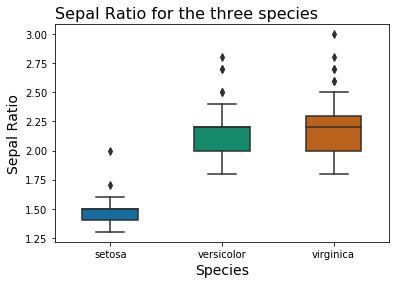

In [4]:
# boxplot from seaborn package
plot2 = sns.boxplot(y='Sepal ratio', x='Species' , data=dataset, width=0.5, palette="colorblind", whis= 1) 
# boxplot showing the distribution of the sepal ratio for each of the three species

plot2.set_title('Sepal Ratio for the three species', fontsize=16, loc= 'left') # setting the title
plot2.set_xlabel('Species',fontsize=14) # setting x-axis label with fontsize 14
plot2.set_ylabel('Sepal Ratio', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot

# Here also we are displaying the boxplot but, from the seaborn package

# We have explained everything related to boxplots earlier but while observing this boxplot we see that there are no median 
# lines for setosa and versicolor so there comes a question as why this happened.

# This happens because of the skewness of the data, the median does not come in the middle of IQR. So we can say that the 
# median depends on how each set of data is distributed so the differnece is due to the outliers.


Although Box and whisker plots handles large data effortlessly, but they do not retain the exact values and the details of the results of the distribution. These graphs only allow a clear summary of large amounts of data so that we can quickly view it and compare it with other data. So inorder to correct it we can add jitters or go for a violin plot.

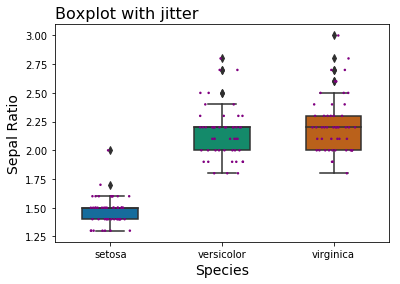

In [5]:
#Boxplot with jitter 
plot2 = sns.boxplot(y='Sepal ratio', x='Species' , data=dataset, width=0.5, palette="colorblind", whis= 1) 
# we first plot the boxplot
plot2 = sns.stripplot(y='Sepal ratio', x='Species', data=dataset, color="purple", jitter=0.2, size=2.5) # we plot the jitters

plt.title("Boxplot with jitter", loc="left", fontsize = 16) # setting the title
plot2.set_xlabel('Species',fontsize=14) # setting x-axis label with fontsize 14
plot2.set_ylabel('Sepal Ratio', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot

Violin plot is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. The thick black bar in the centre represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.

As discussed earlier, box plots are limited in their display of the data, as their visual simplicity tends to hide significant details about how values in the data are distributed, violin plots on the other hand display more information, they can be noisier than a Box Plot.

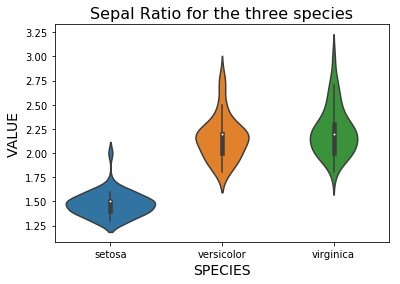

In [6]:
#Violin plot
plot3 = sns.violinplot(x="Species", y="Sepal ratio", data=dataset) # plotting the violin plot

plot3.set_title('Sepal Ratio for the three species', fontsize=16) # setting the title
plot3.set_xlabel('SPECIES',fontsize=14) # setting x-axis label with fontsize 14
plot3.set_ylabel('VALUE', fontsize=14) # setting y-axis label with fontsize 14

plt.show() # displaying the plot

Boxplot vs Violin plot:

1) Box plots show outliers whereas violin plots don't.

2) While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

So both the boxplot and violin plots have their own set of advantages and disadvantages.

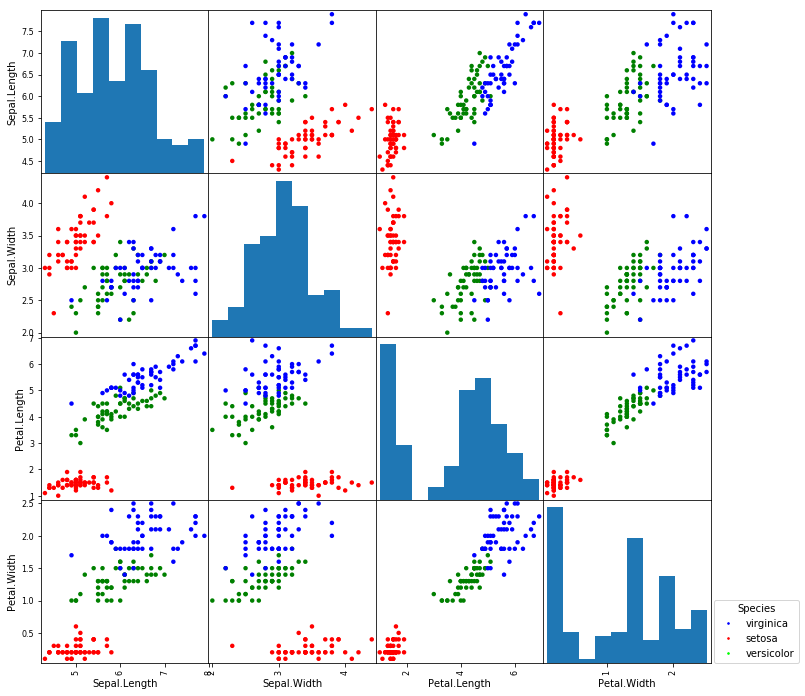

In [10]:
# scatter matrix plot for the four original features of the dataset through pandas package
color_map = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'} #setting the color for the three species
plot4=pd.plotting.scatter_matrix(dataset.iloc[:, 0:5], alpha=1, s=80 , diagonal='hist', figsize=(12,12), c=dataset['Species'].apply(lambda x:color_map[x]))
# plotting the scatter matrix plot

# Since we do not have any feature to display the legend in scatter matrix plot via pandas package
# We manually create a legend here
handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", markersize=np.sqrt(10))[0] for i in range(3)]
labels=["virginica", "setosa", "versicolor"] # setting the labels as the species
plt.legend(handles, labels, loc=(1.02,0), title='Species') # displaying the legend
plt.show() # displaying the plot

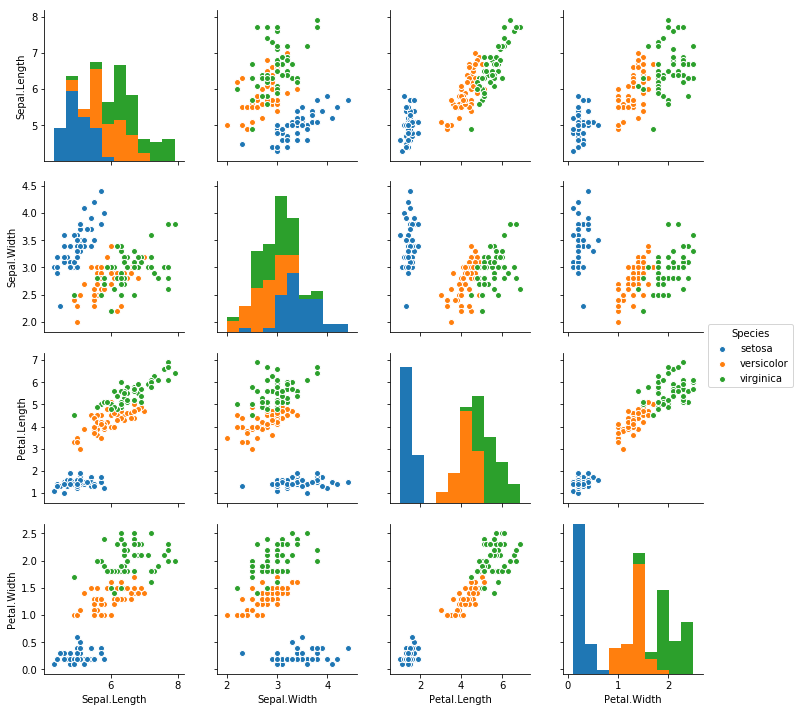

In [8]:
# We can also plot the scatter matrix plot via seaborn package
# The advantage of this package over pandas for scatter matrix plot is that it automatically plots the points as per the colors
# and displays the legend automatically

plot4 = sns.pairplot(dataset.iloc[:, 0:5], hue="Species") # scatter matrix plot for the four original features of the dataset
plt.show() # displaying the plot